In [1]:
# import libraries

In [2]:
# investigate data

# Question 1: Is there a difference in quantity of products sold by discount rate? 

In [3]:
# obtain necessary data

## {Put test name here}
H0: 

HA:

In [4]:
# perform test

## Conclusion

## EffectSize/PowerAnalysis/Tukey Testing (if needed)

# Question 2: Is there a difference in number of orders and territory? 

In [5]:
import numpy as np
import pandas as pd
import sqlite3
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# obtain necessary data
conn = sqlite3.connect('northWind.sqlite')
cur = conn.cursor()

In [7]:
cur.execute('''SELECT name FROM sqlite_master 
                WHERE type ='table' AND name NOT LIKE 'sqlite_%';''')
cur.fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [8]:
cur.execute('''SELECT *  FROM Territory;''')
df_terr = pd.DataFrame(cur.fetchall())
df_terr.columns = [x[0] for x in cur.description]
df_terr.head()

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [9]:
cur.execute('''SELECT * FROM 'Order' ORDER BY Id;''')
df_order = pd.DataFrame(cur.fetchall())
df_order.columns = [x[0] for x in cur.description]
df_order.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [10]:
cur.execute('''SELECT * FROM 'Order' ORDER BY Id;''')
df_order = pd.DataFrame(cur.fetchall())
df_order.columns = [x[0] for x in cur.description]
df_order.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [11]:
cur.execute('''SELECT * FROM EmployeeTerritory ORDER BY EmployeeId;''')
df_emp = pd.DataFrame(cur.fetchall())
df_emp.columns = [x[0] for x in cur.description]
df_emp.head()
## Here one employeeId may have serval TerritoryId 
## which implies it will have a one-many relationship to table Territory

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [12]:
df_terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
Id                      53 non-null object
TerritoryDescription    53 non-null object
RegionId                53 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [13]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB


In [14]:
df_terr['RegionId'].unique()

array([1, 3, 4, 2])

In [15]:
cur.execute(''' SELECT OrderId, Quantity, TerritoryDescription FROM OrderDetail JOIN
                (SELECT 'Order'.Id AS Order_Id, TerritoryDescription, RegionId FROM 'Order' JOIN(
                    SELECT EmployeeId, TerritoryDescription, RegionId FROM EmployeeTerritory JOIN
                    Territory ON TerritoryId=Territory.Id)
                    USING (EmployeeId)
                    ORDER BY Id)
                    ON (Order_Id=OrderId)
                    GROUP BY OrderId, TerritoryDescription;''')
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()
## Because table EmployeeTerritory and table Territory are one-many relationship
## One employeeId may have serval TerritoryId which listed on EmployeeTerritory table

,OrderId,Quantity,TerritoryDescription
0,10248,12,Edison
1,10248,12,Fairport
2,10248,12,Mellvile
3,10248,12,Morristown
4,10248,12,New York


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 3 columns):
OrderId                 3918 non-null int64
Quantity                3918 non-null int64
TerritoryDescription    3918 non-null object
dtypes: int64(2), object(1)
memory usage: 92.0+ KB


In [17]:
df.isna().sum()

OrderId                 0
Quantity                0
TerritoryDescription    0
dtype: int64

In [18]:
df.duplicated('OrderId').sum()

3088

In [19]:
df['count'] = None
df.fillna(1,inplace=True)

In [20]:
## Even though one employeeId may have serval TerritoryId 
## but these TerritoryId have same RegionId
df.head(10)
## If I do the number of orders and territory, then I will keep them 
## because I dont know the orderId goes to which territory
## If I do the number of orders and region, then I will remove duplicated values
## because all the same orderId with differenct territory but have same region

,OrderId,Quantity,TerritoryDescription,count
0,10248,12,Edison,1
1,10248,12,Fairport,1
2,10248,12,Mellvile,1
3,10248,12,Morristown,1
4,10248,12,New York,1
5,10248,12,Providence,1
6,10249,9,Bellevue,1
7,10249,9,Phoenix,1
8,10249,9,Redmond,1
9,10249,9,Scottsdale,1


In [21]:
df_test = df.groupby('TerritoryDescription').sum()
df_test.reset_index(inplace=True)

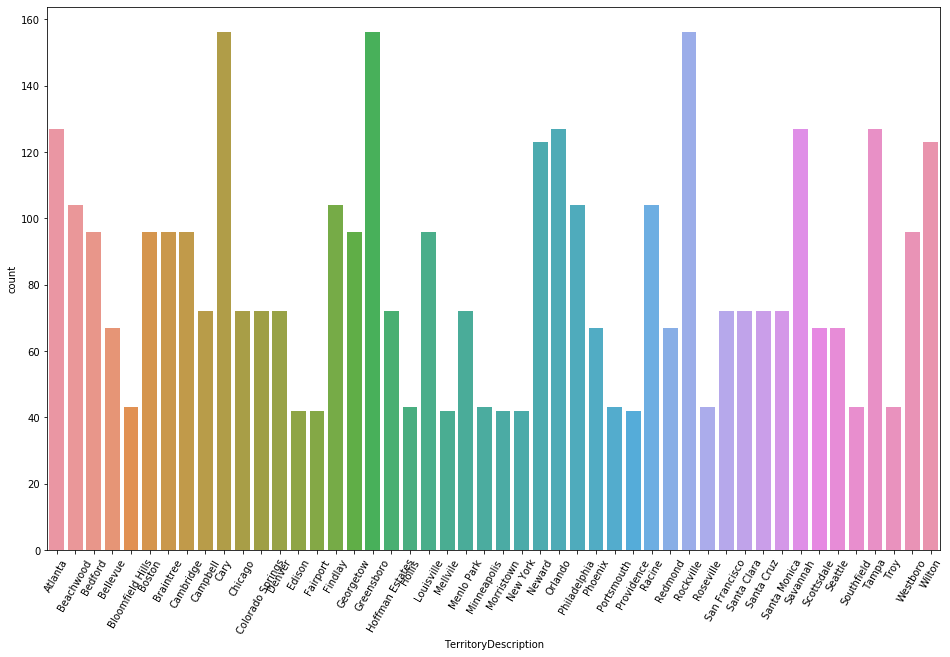

In [22]:
plt.figure(figsize=(16,10))
chart = sns.barplot(x=df_test['TerritoryDescription'], y=df_test['count'])
chart_labels = chart.set_xticklabels(chart.get_xticklabels(), rotation=60)

In [23]:
df.head()

,OrderId,Quantity,TerritoryDescription,count
0,10248,12,Edison,1
1,10248,12,Fairport,1
2,10248,12,Mellvile,1
3,10248,12,Morristown,1
4,10248,12,New York,1


In [24]:
df.groupby(['OrderId','TerritoryDescription']).sum().reset_index()
quant_dict = {}
for terr in df['TerritoryDescription'].unique():
    quant_dict[terr] = np.array(df.loc[df['TerritoryDescription']==terr].groupby('OrderId').sum()['Quantity'])

In [25]:
#sns.distplot(quant_dict[terr], label=terr) 

## Test there are any difference in number if orders and territory?
H0: There is no difference in number of orders and territory 

HA: There is difference in number of orders and territory

In [26]:
scs.shapiro(df['count'])

/Users/jrchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


ShapiroResult(statistic=1.0, pvalue=1.0)

In [27]:
scs.shapiro(df_test['count'])

ShapiroResult(statistic=0.9001028537750244, pvalue=0.0006335758371278644)

In [28]:
scs.normaltest(df_test['count'])
# NormaltestResult(statistic=3.088936389463037, pvalue=0.21342534176930414)

NormaltestResult(statistic=3.3970169356392086, pvalue=0.1829562057138715)

In [29]:
scs.chisquare(df_test['count'])
# Power_divergenceResult(statistic=629.8424242424243, pvalue=5.543800946229144e-103)

Power_divergenceResult(statistic=656.2113323124042, pvalue=2.614006614224833e-108)

In [30]:
def check_skew_kurtosis(sample):
    skew = scs.skew(sample)
    if np.abs(skew)<0.5:
        print ('The data are pretty symmetrical with skew={}'.format(skew))
    elif (np.abs(skew)>0.5 and np.abs(skew)<1):
        print ('The data are moderately skewed with skew={}'.format(skew))
    else:
        print ('The data are highly skewed with skew={}'.format(skew))
    kurtosis = scs.kurtosis(df_test['count'])
    if kurtosis<3:
        print ('Platykurtic: the distribution is shorter and tails are thinner with kurtosis={}'.format(kurtosis))
    elif kurtosis>3:
        print ('Leptokurtic: the distribution with longer and fatter tails with kurtosis={}'.format(kurtosis))
    else:
        print ('Mesokurtic: the diftribution is close to normal distribution')

In [31]:
check_skew_kurtosis(df_test['count'])

The data are moderately skewed with skew=0.5666881606493758
Platykurtic: the distribution is shorter and tails are thinner with kurtosis=-0.5472729048035831


In [32]:
df_test.head()

,TerritoryDescription,OrderId,Quantity,count
0,Atlanta,1354153,2846,127
1,Beachwood,1106793,2378,104
2,Bedford,1027871,2034,96
3,Bellevue,713137,1275,67
4,Bloomfield Hills,461193,974,43


In [33]:
# perform test
formula = 'count ~ C(TerritoryDescription)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                               sum_sq      df          F  PR(>F)
C(TerritoryDescription)  1.665211e-27    47.0  69.055994     0.0
Residual                 1.985551e-27  3870.0        NaN     NaN


In [34]:
# for abnormal
scs.wilcoxon(df['count'])

WilcoxonResult(statistic=0.0, pvalue=0.0)

## Conclusion

In [35]:
## The shapiro test with p-value 0.00118 which is less than 0.05. We can reject the null hypothises.
## Therefore the data does not fit the normal distribution.
## And we choose wilcoxon test which gives us p_value 0 which is less than 0.05. We can reject the null hypothises.
## Therefore there is difference in number of orders and territory

# Question 3: {You decide}

In [36]:
# obtain necessary data

## {Put test name here}
H0: 

HA:

In [37]:
# perform test

## Conclusion

## EffectSize/PowerAnalysis/Tukey Testing (if needed)